In [1]:
###################
# This gets run by the conftest.py NotebookFile plugin and asserts that all output cells
# are identical (within tolerance) to the last run. Failed runs will save the output to a
# separate file for review. If using `act -j test`, you will need to also pass `--bind`
# to get that file.
###################
from coorx.image import Image
import numpy as np
import matplotlib.pyplot as plt

<PointArray (4, 2) in image_4> <PointArray (4, 2) in image_5> <PointArray (4, 2) in image_6> <PointArray (4, 2) in image_7>


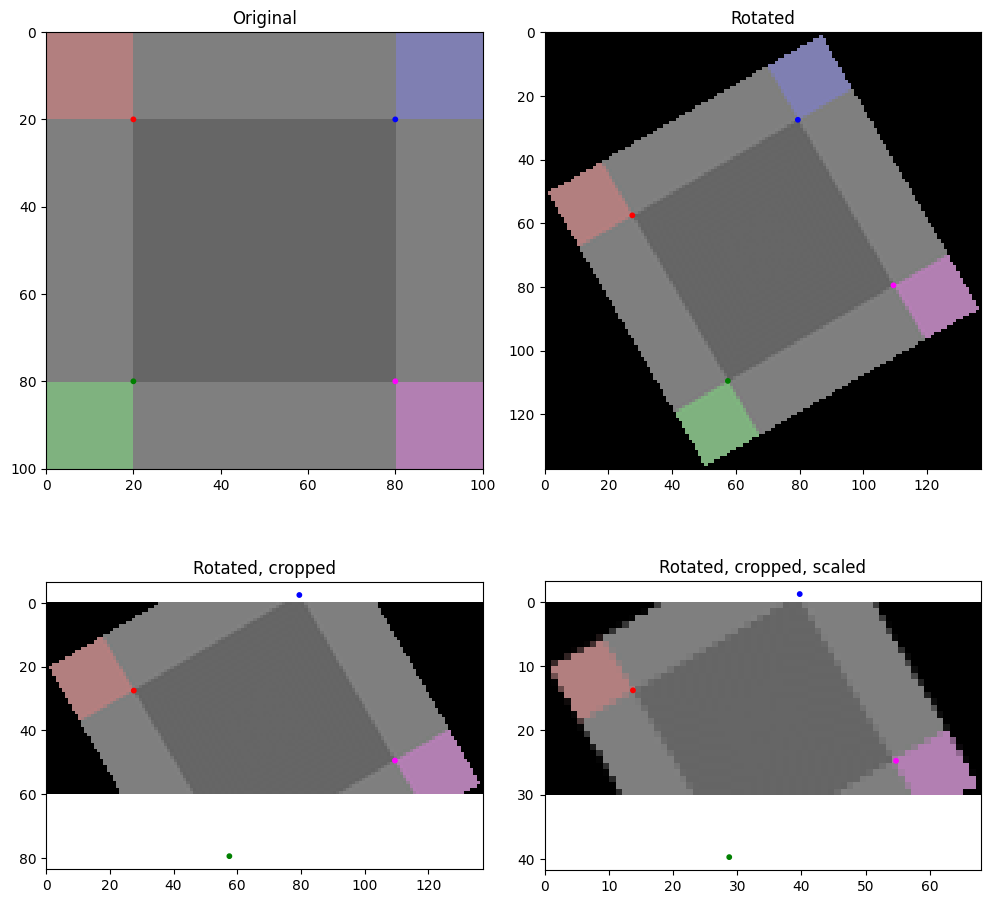

In [3]:
img_data = np.ones((100, 100, 3)) * 0.5
img_data[20:80, 20:80] -= 0.1
img_data[:20, :20, 0] += .2
img_data[80:, :20, 1] += .2
img_data[:20, 80:, 2] += .2
img_data[80:, 80:, [0,2]] += .2

img1 = Image(img_data, axes=(0, 1))
pts1 = img1.point_array([[20, 20], [80, 20], [20, 80], [80, 80]])

img2 = img1.rotate(30, axes=(0, 1), order=2, prefilter=True)
pts2 = pts1.mapped_to(img2.system)

img3 = img2[30:90, :]
pts3 = pts1.mapped_to(img3.system)

img4 = img3.zoom(0.5, prefilter=True, order=1)
pts4 = pts1.mapped_to(img4.system)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(img1.image, cmap='gray', extent=(0, img1.shape[1], img1.shape[0], 0))
ax[0, 0].scatter(pts1[:, 1], pts1[:, 0], color=('red', 'green', 'blue', 'magenta'), s=10)
ax[0, 0].set_title('Original')

ax[0, 1].imshow(img2.image, cmap='gray', extent=(0, img2.shape[1], img2.shape[0], 0))
ax[0, 1].scatter(pts2[:, 1], pts2[:, 0], color=('red', 'green', 'blue', 'magenta'), s=10)
ax[0, 1].set_title('Rotated')

ax[1, 0].imshow(img3.image, cmap='gray', extent=(0, img3.shape[1], img3.shape[0], 0))
ax[1, 0].scatter(pts3[:, 1], pts3[:, 0], color=('red', 'green', 'blue', 'magenta'), s=10)
ax[1, 0].set_title('Rotated, cropped')

ax[1, 1].imshow(img4.image, cmap='gray', extent=(0, img4.shape[1], img4.shape[0], 0))
ax[1, 1].scatter(pts4[:, 1], pts4[:, 0], color=('red', 'green', 'blue', 'magenta'), s=10)
ax[1, 1].set_title('Rotated, cropped, scaled')

fig.tight_layout()

# So that tests can tell if these values have changed
print(pts1, pts2, pts3, pts4)

In [ ]:
# 3D version, with messy axes
img_data_3d = np.ones((10, 3, 100, 100)) * 0.5
img_data_3d[:, :, 20:80, 20:80] -= 0.1
img_data_3d[:, :, :20, :20] += .2
img_data_3d[:, :, 80:, :20] += .2
img_data_3d[:, :, :20, 80:] += .2
img_data_3d[:, :, 80:, 80:] += .2
img1_3d = Image(img_data_3d, axes=(0, 2, 3))
pts1_3d = img1_3d.point_array([[0, 20, 20], [0, 80, 20], [0, 20, 80], [0, 80, 80]])
img2_3d = img1_3d.rotate(30, axes=(1, 2), order=2, prefilter=True)
